## What are the variables that have the greatest influence on math grades?
## Is it possible to predict student grades based on these variables?

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  Nr

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

# Data Cleaning

In [6]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Drop Columns

In [7]:
df = df.drop("Unnamed: 0", axis=1)

## Drop NaNs

In [8]:
cols_to_drop = ["EthnicGroup","ParentEduc","TestPrep","ParentMaritalStatus","PracticeSport", "IsFirstChild","NrSiblings","TransportMeans","WklyStudyHours"]
df = df.dropna(subset=cols_to_drop, axis=0)

In [9]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [10]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


# Type of data

Data - Categorical - Ordinal = "ParentEduc", "TestPrep", "PracticeSport"
Data - Categorical - Nominal = "Gender", "EthnicGroup", "LunchType", "ParentMaritalStat", "PracticeSport", "IsFirstChild", "TransportMeans"] 
Data - Numerical - Discrete = "WklyStudyHours", "NrSiblings"
Data - Numerical - Continuous = "MathScore","ReadingScore","WritingScore "

## Transformation of Categorical data 

### Ordinal data - Label incoding
<p>"ParentEduc"</p> 
<p>"TestPrep"</p>
<p>"PracticeSport"</p>

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### ParentEduc

In [12]:
df["ParentEduc"].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', 'some high school', "bachelor's degree"],
      dtype=object)

In [13]:
le.fit(["some high school","high school" ,"some college", "associate's degree", "bachelor's degree", "master's degree"])
df["ParentEduc"] = le.transform(df["ParentEduc"])

#### TestPrep

In [14]:
df["TestPrep"].unique()

array(['none', 'completed'], dtype=object)

In [15]:
le.fit(['none', 'completed'])
df["TestPrep"] = le.transform(df["TestPrep"])

#### PracticeSport

In [16]:
df["PracticeSport"].unique()

array(['sometimes', 'regularly', 'never'], dtype=object)

In [17]:
le.fit(["never", "sometimes", "regularly"])
df["PracticeSport"] = le.transform(df["PracticeSport"])

#### WklyStudyHours

In [18]:
df["WklyStudyHours"].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [19]:
le.fit(['< 5', '5 - 10', '> 10'])
df["WklyStudyHours"] = le.transform(df["WklyStudyHours"])

### Nominal - Getdummies

<p>"Gender"</p>
<p>"EthnicGroup" </p>
<p>"LunchType"</p>
<p>"ParentMaritalStat"</p> 
<p>"PracticeSport"</p> 
<p>"IsFirstChild"</p>
<p>"TransportMeans"</p>

In [20]:
df = pd.get_dummies(df, columns=["Gender", "EthnicGroup", "LunchType", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "TransportMeans"])

## Correlación
Si la correlación es de más de 0.75 (positiva o negativa) empezar a evaluar si se saca o no. <br>
Mirar si las dos categorías con alta correlación tienen un P-Value alto.
#### Features númericas diferentes que tienen alta correlación
Dos categorías numericas diferentes pero correlacionadas--> hay que eliminar una.

### Features con datos categoricos la correlación entre las opciones son del 100%
###### Cuando son datos categoricos cada opción de esa feature se convierte en una variable por si sola.
En las features que tienen como typo de datos, datos categoricos necesito convertir<br>
cada opción en una feature diferente (lo hago con "getdummies" ).<br>
Ejemplo: Feature: Hacer ejercicio con. Opciones: nada-poco-mucho<br>
Son tres features diferentes.<br>

###### Es necesario sacar una para que las otras dos la tomen como referencia y así poder interpretarlas.
Normalmente se quita la más común, la básica. En el ejemplo de recién sería: nunca.<br>
Si no se saca se distrosionan los resultados que da el algoritmo y no aportarán información<br> 


### Mapa de correlaciones (Hitmap) sin eliminar categorias

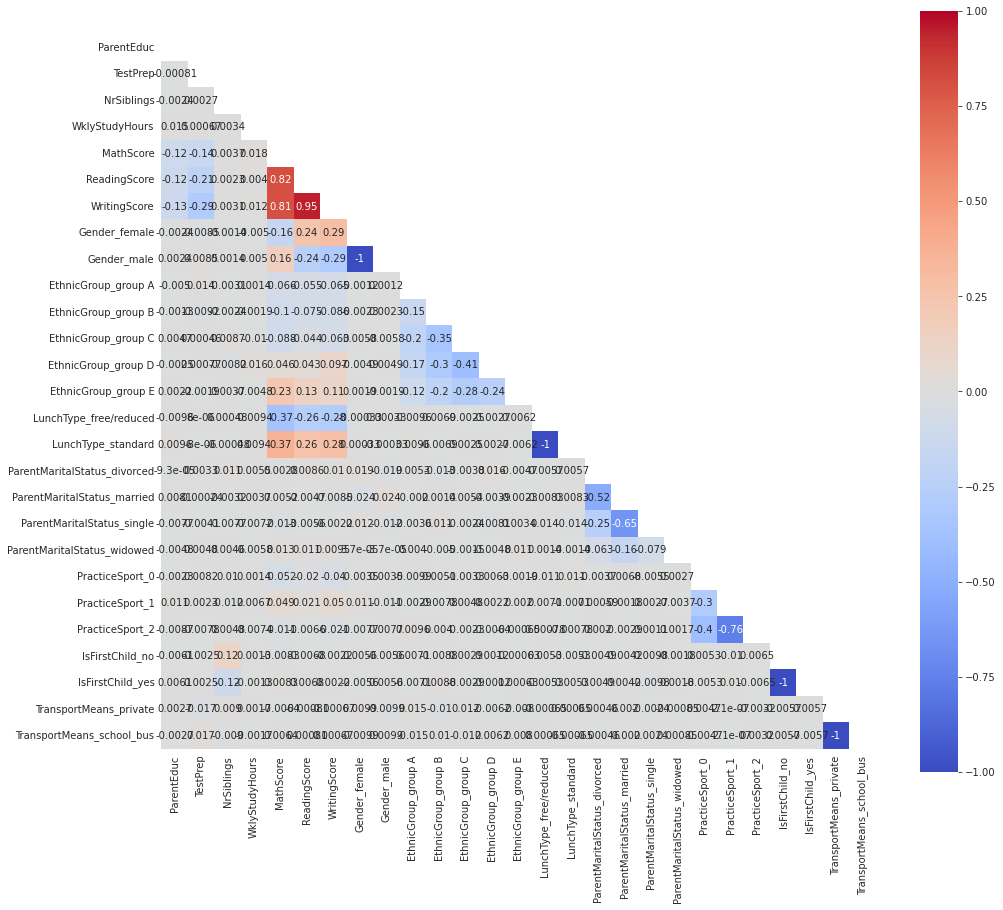

In [21]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Preguntar a aleks
Preguntar por qué hay una alta correlación entre hacer ejercicio 1 y hacer ejercicio 2.Qué significa? Qué hago en este caso? Elimino una feature o no?<br>
Preguntar por qué cuando no se saca una opción en las features categorícas se distoriona resultado que da el algoritmo <br>
Qué es R^2?<br>
Qué es P-Value?

### Define base categories (eliminar la categoría base)
Elimino una de las categorías de cada feature con datos categoricos.<br>
La categoría que elimino es la base category, la referencia con la que compararé los datos depués, el 0.

In [22]:
df = df.drop(['Gender_male', 'EthnicGroup_group A', 'LunchType_standard', 'ParentMaritalStatus_married', 'PracticeSport_0', 'IsFirstChild_yes','TransportMeans_school_bus'] ,axis=1)

### Eliminar features que tengan una alta correlación
En este caso las features "WritingScore" y "ReadingScore" tienen una alta correlación positiva de 0.95.<br>
Esto hace que no se aporte información nueva y no se vea claramente el efecto individual<br>
que tienen las dos categorías sobre el resultado.<br>
Es necesario decidir cual de las dos categorías quitar del analisis y cual mantener.

In [23]:
df = df.drop(['WritingScore'],axis=1)

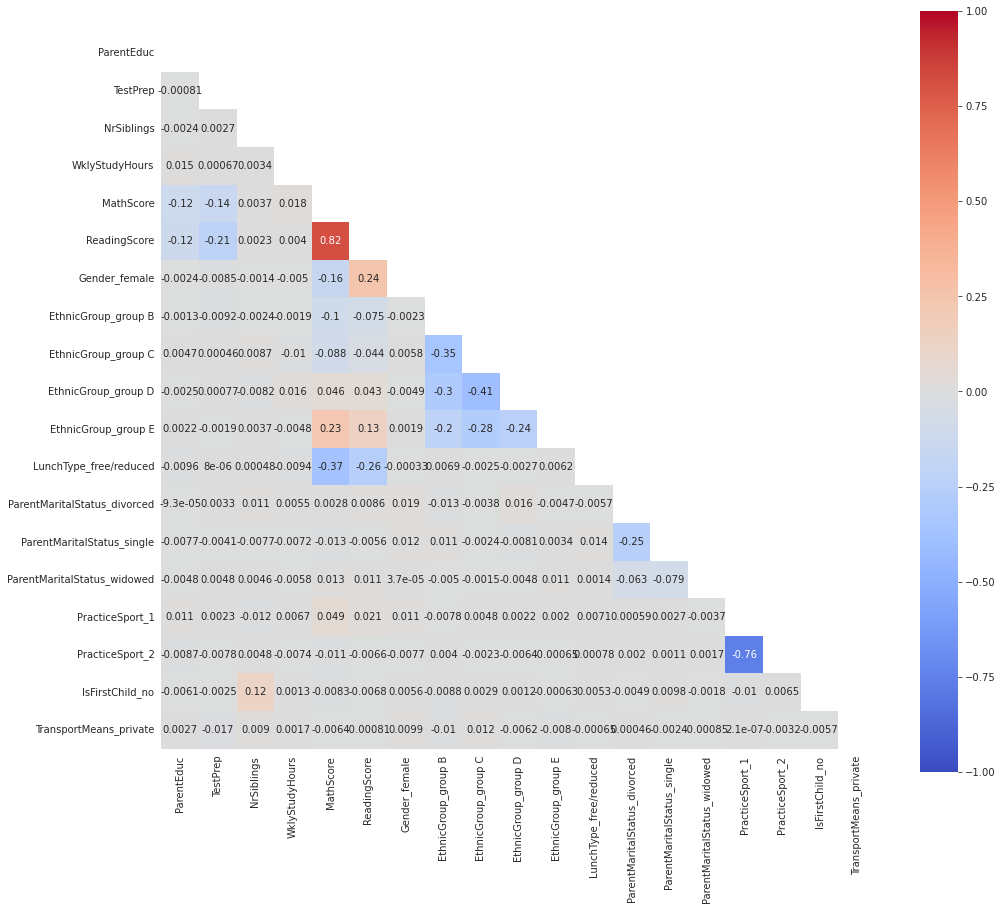

In [24]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Linear Regression - OLS

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column

RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

dfX = df.drop('MathScore',axis=1)

X=dfX
y=df['MathScore']

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)


## Model Development

In [27]:
import statsmodels.api as sm

#Añado la constante. Esto hace que la Regresión sea más exacta ya que tiene una variable más para ajustarse, es decir, 
# que permite que la recta no necesariamente surja del 0 si no de algún otro valor del eje Y 

# Añado constante
X_train_const_ct = sm.add_constant(X_train.to_numpy()) 

# Entreno el modelo con el training set
model = sm.OLS(y_train, X_train_const_ct).fit()

In [28]:
# hacer que en el summary del OLS (Lineal Regression) salgan los nombres de las columnas en lugar de las x1,x2,x3
# para eso es necesario agregar la columna "const" a la lista con nombre de las columnas.

features = list(['const']) + list(X.columns)
print_model = model.summary(xname=features)

print(print_model)

                            OLS Regression Results                            
Dep. Variable:              MathScore   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3980.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        16:15:24   Log-Likelihood:                -43420.
No. Observations:               13470   AIC:                         8.688e+04
Df Residuals:                   13451   BIC:                         8.702e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Significado de:<br>
**coef**: es la influencia de la feature en la target vaule (en la nota de matemáticas)<br>
**R squeared**: [todavía no sé exáctamente qué es pero] mientras más cerca de uno mejor <br>
**P>t (P-Value)**: es la fiabilidad de la predicción. Me puedo fiar de la predicción (es significativo) si el valor está entre 0 y 0,05

Con este resumen puedo ecplicar qué variables tiene nmás o menos influencia sobre la Terget Value, es decir, sobre las notas de matemáticas.

### Explicación de la influencia o no de las variables:
Hermanos no es significativo porque puede que tus padres se tengan que dividir más el tiempo entre los hermanos o que tus hermanos te puedan ayudar.
    

### Evaluation

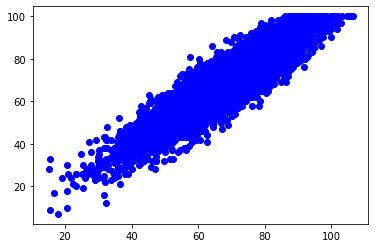

In [29]:
# Le agrego la constante al X_test
X_test_const_ct = sm.add_constant(X_test)
# lo pruebo para ver si la y que predije es la que era realmente (y_test) 
predictions_test = model.predict(X_test_const_ct)

plt.scatter(predictions_test, y_test, color = 'b')
plt.show()

#ejer x es mi predicción y el eje y es la nota real. para los alumnos que yo predije 80 el resultado real fue desde 60 a 90
#mientras más dispersa la linea más errores tiene y menos util es la predicción.


## Model Evaluation

### Data scatter of predicted values

In [30]:
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test, color = 'b')
plt.show()

ValueError: shapes (5773,18) and (19,) not aligned: 18 (dim 1) != 19 (dim 0)

### Feature Importances

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': regr.coef_.reshape(len(X_train.columns),)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()